# WELCOME TO DATA EXPLORATORY ANALYSIS FOR CREDIT CARD 


###

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cust_a=pd.read_csv('Customer Acqusition.csv')
cust_a
Repayment=pd.read_csv('Repayment.csv')
spend=pd.read_csv('spend.csv')
Repayment.drop('Unnamed: 4',axis=1,inplace=True)
Repayment.dropna(how='all',inplace=True)
spend["Month"]=pd.to_datetime(spend["Month"])
Repayment["Month"]=pd.to_datetime(Repayment["Month"])


In [2]:
Repayment.rename(columns={'SL No:': 'SL No'}, inplace=True)
spend.rename(columns={'Sl No:': 'SL No'}, inplace=True)
cust_a.rename(columns={'No': 'SL No'}, inplace=True)


#### 1)a. In case age is less than 18, replace it with mean of age values.

In [3]:
mean_age = cust_a.loc[cust_a['Age'] >= 18, 'Age'].mean()
mean_age = int(mean_age)
cust_a.loc[cust_a['Age']<=18 ,'Age']=mean_age
cust_a


,SL No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [4]:
age=cust_a['Age']<=18
age.sum()

0

In [13]:
import warnings
warnings.filterwarnings('ignore')

#### 1) b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [6]:
Customer_Spend_Transaction=pd.merge(left=cust_a,right=spend,on='Customer')
Customer_Spend_Transaction['Amount']=np.where(Customer_Spend_Transaction.Amount>Customer_Spend_Transaction.Limit,Customer_Spend_Transaction.Limit/2,Customer_Spend_Transaction.Amount)

print("\nDataFrame after replacing spend amounts exceeding the limit:")
Customer_Spend_Transaction


DataFrame after replacing spend amounts exceeding the limit:


,SL No_x,Customer,Age,City,Product,Limit,Company,Segment,SL No_y,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00


### 1) c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [7]:
repayment_customer=pd.merge(left=Repayment,right=cust_a,left_on='Customer',right_on='Customer',how='left')
repayment_customer['Amount']=np.where(repayment_customer.Amount>repayment_customer.Limit,repayment_customer.Limit,repayment_customer.Amount)
repayment_customer=repayment_customer.dropna(how="all")
repayment_customer["Month"]=pd.to_datetime(repayment_customer["Month"])
 
repayment_customer

,SL No_x,Customer,Month,Amount,SL No_y,Age,City,Product,Limit,Company,Segment
0,NaN,A1,2004-01-12,495414.75,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,2004-01-03,245899.02,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,2004-01-15,259490.06,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,2004-01-25,437555.12,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,2005-01-17,165972.88,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...
1495,1496.0,A67,2005-05-09,55638.77,67,54,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497.0,A68,2006-05-10,100000.00,68,48,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498.0,A69,2006-07-11,10000.00,69,33,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499.0,A70,2005-08-12,10001.00,70,48,BOMBAY,Platimum,10001.0,C32,Self Employed


### 2. From the above dataset create the following summaries

#### a. How many distinct customers exist?

In [8]:

print("The count of distinct customers is:",repayment_customer['Customer'].nunique())

The count of distinct customers is: 100


#### b. How many distinct categories exist?

In [9]:
print("The count of distinct categories is:",Customer_Spend_Transaction['Product'].nunique())

The count of distinct categories is: 3


#### c. What is the average monthly spend by customers?

In [10]:
Customer_Spend_Transaction['Month']=pd.to_datetime(Customer_Spend_Transaction['Month'])
Customer_Spend_Transaction['Months']=Customer_Spend_Transaction['Month'].dt.to_period('M')
Customer_Spend_Amount=Customer_Spend_Transaction.groupby(['Customer','Month'])[['Amount']].mean().reset_index()
Customer_Spend_Amount['Spend_Month']=Customer_Spend_Amount['Month'].apply(lambda x:x.month)
AvgMonthlySpend=Customer_Spend_Amount.groupby(['Customer','Spend_Month'])[['Amount']].mean().reset_index()
AvgMonthlySpend

,Customer,Spend_Month,Amount
0,A1,1,341332.87700
1,A1,2,138421.15125
2,A1,4,261649.25000
3,A1,5,361141.31000
4,A1,8,344372.10000
...,...,...,...
573,A95,1,240401.50000
574,A96,1,54729.66000
575,A97,1,5000.00000
576,A98,1,5000.50000


### Hence, The average monthly spend by customers are shown by the above dataset.

####  d. What is the average monthly repayment by customers?

In [11]:
repayment_customer['Months']=Repayment['Month'].dt.to_period('M')

Customer_Repayment_Amount=repayment_customer.groupby(['Customer','Month'])[['Amount']].mean().reset_index()
Customer_Repayment_Amount['Repayment_Month']=Customer_Repayment_Amount['Month'].apply(lambda x:x.month)
AvgMonthlyRepayment=Customer_Repayment_Amount.groupby(['Customer','Repayment_Month'])[['Amount']].mean().reset_index()
AvgMonthlyRepayment

,Customer,Repayment_Month,Amount
0,A1,1,325723.331
1,A1,2,137713.785
2,A1,4,254474.580
3,A1,7,297176.740
4,A1,9,186427.500
...,...,...,...
553,A95,1,369405.960
554,A96,1,100000.000
555,A97,1,10000.000
556,A98,1,10001.000


### Hence, The average monthly repayment by customers are shown by the above dataset.

### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [12]:
AvgMonthlyCustomers=pd.merge(left=AvgMonthlySpend,right=AvgMonthlyRepayment,left_on=['Customer','Spend_Month'],right_on=['Customer','Repayment_Month'])
AvgMonthlyCustomers['Monthly_Profit']=AvgMonthlyCustomers['Amount_y']-AvgMonthlyCustomers['Amount_x']
AvgMonthlyCustomers['Profit']=np.where(AvgMonthlyCustomers['Monthly_Profit']>0,AvgMonthlyCustomers['Monthly_Profit']*2.9/100,np.nan)
AvgMonthlyCustomers

,Customer,Spend_Month,Amount_x,Repayment_Month,Amount_y,Monthly_Profit,Profit
0,A1,1,341332.87700,1,325723.331000,-15609.546000,NaN
1,A1,2,138421.15125,2,137713.785000,-707.366250,NaN
2,A1,4,261649.25000,4,254474.580000,-7174.670000,NaN
3,A1,11,183839.61000,11,285729.090000,101889.480000,2954.794920
4,A10,1,173828.28250,1,283324.721667,109496.439167,3175.396736
...,...,...,...,...,...,...,...
449,A95,1,240401.50000,1,369405.960000,129004.460000,3741.129340
450,A96,1,54729.66000,1,100000.000000,45270.340000,1312.839860
451,A97,1,5000.00000,1,10000.000000,5000.000000,145.000000
452,A98,1,5000.50000,1,10001.000000,5000.500000,145.014500


### Hence. If the monthly rate of interest is 2.9%, The profit of each month for the bank is as mentioned above dataset

#### f. What are the top 5 product types?

In [23]:
Customer_Spend_Transaction.groupby('Type').Amount.sum().reset_index().nlargest(5,'Amount')

,Type,Amount
10,PETRO,28597384.98
4,CAMERA,27690738.44
7,FOOD,20519243.60
0,AIR TICKET,20155847.12
14,TRAIN TICKET,19995825.72


#### Hence,Top 5 product types are as mentioned above 

#### g. Which city is having maximum spend?

In [28]:
Customer_Spend_Transaction.groupby('City').Amount.sum().reset_index().nlargest(1,'Amount')

,City,Amount
4,COCHIN,45963513.5


#### Hence, COCHIN city is having maximum spend

#### h. Which age group is spending more money?

In [56]:
Customer_Spend_Transaction['Age_group']=np.where(((Customer_Spend_Transaction.Age.astype(int) >= 18 ) & (Customer_Spend_Transaction.Age.astype(int)< 26)),"Young stars",np.where(((Customer_Spend_Transaction.Age.astype(int) >= 26 ) & (Customer_Spend_Transaction.Age.astype(int) < 60)),'Adults','Seniors'))
Customer_Spend_Transaction.groupby('Age_group').Amount.sum()

Age_group
Adults         1.459936e+08
Seniors        4.935734e+07
Young stars    2.443020e+07
Name: Amount, dtype: float64

#### Hence, Seniors(60 and morethen 60) are spending more Money as compare to other

#### i. Who are the top 10 customers in terms of repayment

In [60]:
repayment_customer.groupby('Customer').Amount.sum().reset_index().nlargest(10,'Amount')

,Customer,Amount
58,A61,10539142.91
57,A60,9876290.74
5,A13,9572000.66
38,A43,8489871.46
40,A45,8448334.87
4,A12,8334760.16
6,A14,7943268.63
39,A44,7744730.12
33,A39,7622483.30
37,A42,7615460.86


#### Hence,The top 10 customers in terms of repayment are as mentioned above 

### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [67]:
Customer_Spend_Transaction['Year']=Customer_Spend_Transaction['Month'].apply(lambda x:x.year)
city_wise_spend=Customer_Spend_Transaction.pivot_table(index='City',columns=['Product','Year'],values='Amount',aggfunc='sum')
city_wise_spend

Product           Gold                              Platimum              \
Year              2004         2005         2006        2004        2005   
City                                                                       
BANGALORE   9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY      6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA    7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI     1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN      7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   
DELHI       2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA       2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM  2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

Product                     Silver                         
Year              2006        2004       2005        2006  
City                                                       
BANGALORE    685831.27  1291852.58  830612.34  1415480.94  
BOMBAY       972130.01   532089.03  508988.54  1092833.80  
CALCUTTA    3589606.66   500006.00  440147.06  1157956.42  
CHENNAI     5024923.40   282056.86  377184.49   350009.50  
COCHIN      4920592.29   814229.62  652269.38  1269990.87  
DELHI        176788.72   768172.30  612311.21   854899.97  
PATNA       1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM  2147403.75   209667.48  269912.99   555862.12

<Figure size 1000x700 with 0 Axes>

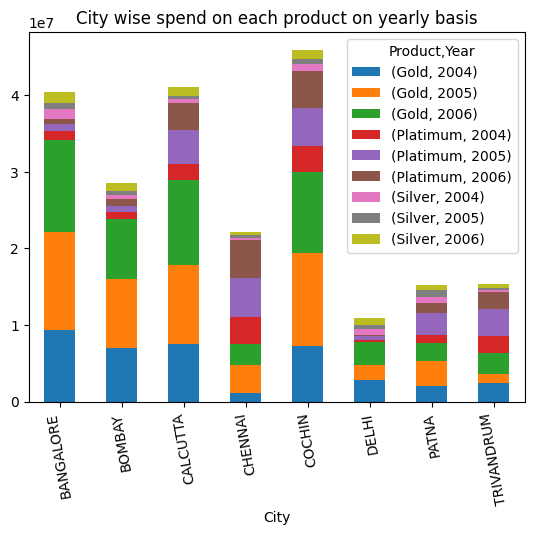

In [84]:
plt.figure(figsize=(10,7))
city_wise_spend.plot(kind='bar',stacked=True)
plt.xticks(rotation=100)
plt.title('City wise spend on each product on yearly basis')
plt.show()

### 4. Create graphs for
#### a. Monthly comparison of total spends, city wise

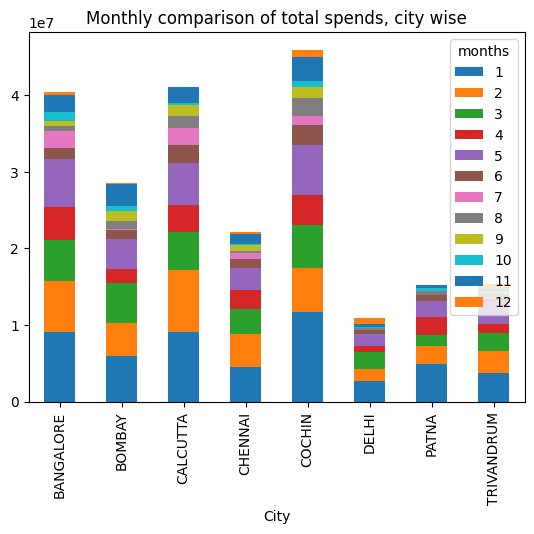

In [96]:
Customer_Spend_Transaction['months']=Customer_Spend_Transaction['Months'].apply(lambda x:x.month)
pd.pivot_table(data=Customer_Spend_Transaction,index='City',columns='months',values='Amount',aggfunc='sum').plot(kind='bar',stacked=True)
plt.title('Monthly comparison of total spends, city wise')
plt.show()

#### b. Comparison of yearly spend on air tickets

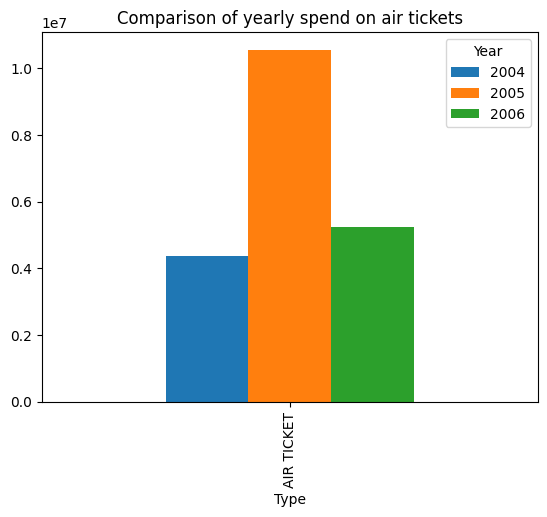

In [119]:
pd.pivot_table(data=Customer_Spend_Transaction[Customer_Spend_Transaction.Type=='AIR TICKET'],index ='Type',columns='Year',values='Amount',aggfunc='sum').plot(kind='bar')
plt.title('Comparison of yearly spend on air tickets')
plt.show()

#### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

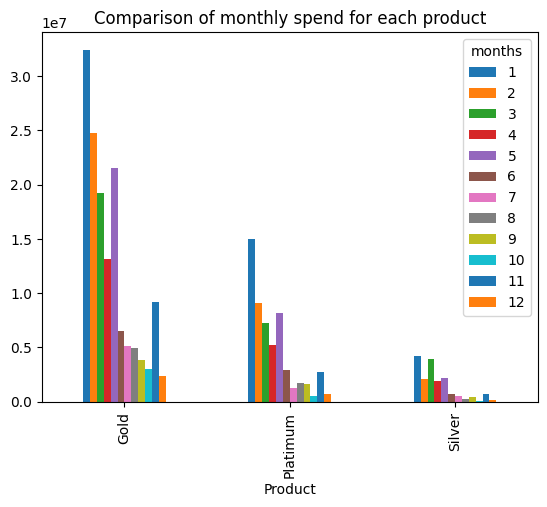

In [122]:
pd.pivot_table(data=Customer_Spend_Transaction,index='Product',columns='months',values='Amount',aggfunc='sum').plot(kind='bar')
plt.title('Comparison of monthly spend for each product')
plt.show()

### 5. Write user defined PYTHON function to perform the following analysis:
  You need to find top 10 customers for each city in terms of their repayment amount by 
  different products and by different time periods i.e. year or month. The user should be able 
  to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
  function should automatically take these inputs while identifying the top 10 customers.

In [136]:
repayment_customer['yearly']=repayment_customer.Month.apply(lambda x:x.year)
repayment_customer['monthly']=repayment_customer.Month.apply(lambda x:x.month)

In [137]:
def top10Customers(product_category,time_period):
    return repayment_customer.loc[(repayment_customer.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().nlargest(10,'Amount')

In [141]:
product_category=str(input("Please Enter Product Category for Example Gold/Silver/Platimum: "))
time_period=str(input("Please Enter Time Period and time period should be in yearly/monthly: "))

Please Enter Product Category for Example Gold/Silver/Platimum:  Platimum
Please Enter Time Period and time period should be in yearly/monthly:  monthly


In [142]:
top10Customers_Analysis=top10Customers(product_category,time_period)

In [143]:
top10Customers_Analysis

,Customer,City,Product,monthly,Amount
114,A41,COCHIN,Platimum,1,2089998.54
118,A41,COCHIN,Platimum,5,1999863.05
106,A40,CALCUTTA,Platimum,1,1749083.51
94,A39,TRIVANDRUM,Platimum,5,1668976.58
80,A38,CHENNAI,Platimum,1,1655584.31
90,A39,TRIVANDRUM,Platimum,1,1565119.57
208,A56,CHENNAI,Platimum,3,1500854.63
109,A40,CALCUTTA,Platimum,5,1401293.97
81,A38,CHENNAI,Platimum,2,1365681.76
91,A39,TRIVANDRUM,Platimum,2,1212860.65
